<h3><b>Imports Python Plotting Modules</b></h3>

In [2]:
import math
from typing import List, Tuple, Dict

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = (22, 12)
plt.rcParams.update({'text.color':'black', 'axes.labelcolor':'black', 'xtick.color':'black', 'ytick.color':'black'})

<h3><b>Loading Plotting Datas</b></h3>

In [13]:
def load_errors(path: str) -> Dict[List[float], List[float]]: 
    results = {}
    with open(path, mode='r', encoding='utf-8') as f_in:
        for line in f_in.readlines():
            line = line.split(":")
            results[line[0]] = float(line[1])
    return results

def load(path: str) -> Tuple[List[float], List[float]]:
    x = []
    y = []
    with open(path, mode='r', encoding='utf-8') as f_in:
        for line in f_in.readlines():
            _x, _y = line.split()
            _x = float(_x)
            _y = float(_y)
            if _x == math.nan or _y == math.nan:
                continue
            x.append(_x)
            y.append(_y)
    return x, y

# function f
x, f_x = load("./function.txt")

# lagrangian 
x_lagrangian, y_lagrangian = load("./lagrangian.txt")
# lagragian Tchebyshev
x_lagrangian_tchebyshev, y_lagrangian_tchebyshev = load("./lagrangianTchebyshev.txt")

# linear splines
x_linear_splines, y_linear_splines = load("./linearSplines.txt")

#cubic splines
x_cubic_splines, y_cubic_splines = load("./cubicSplines.txt")

# samples
x_samples, y_samples = load("./samples.txt")
# lagrangian Tchebyshev samples
x_lagrangian_tchebyshev_samples, y_lagrangian_tchebyshev_samples = load("./samplesTchebyshev.txt")

# errors
errors = load_errors("./errors.txt")

<h3><b>Lagrangian Interpolation + Tchebyshev</b></h3>

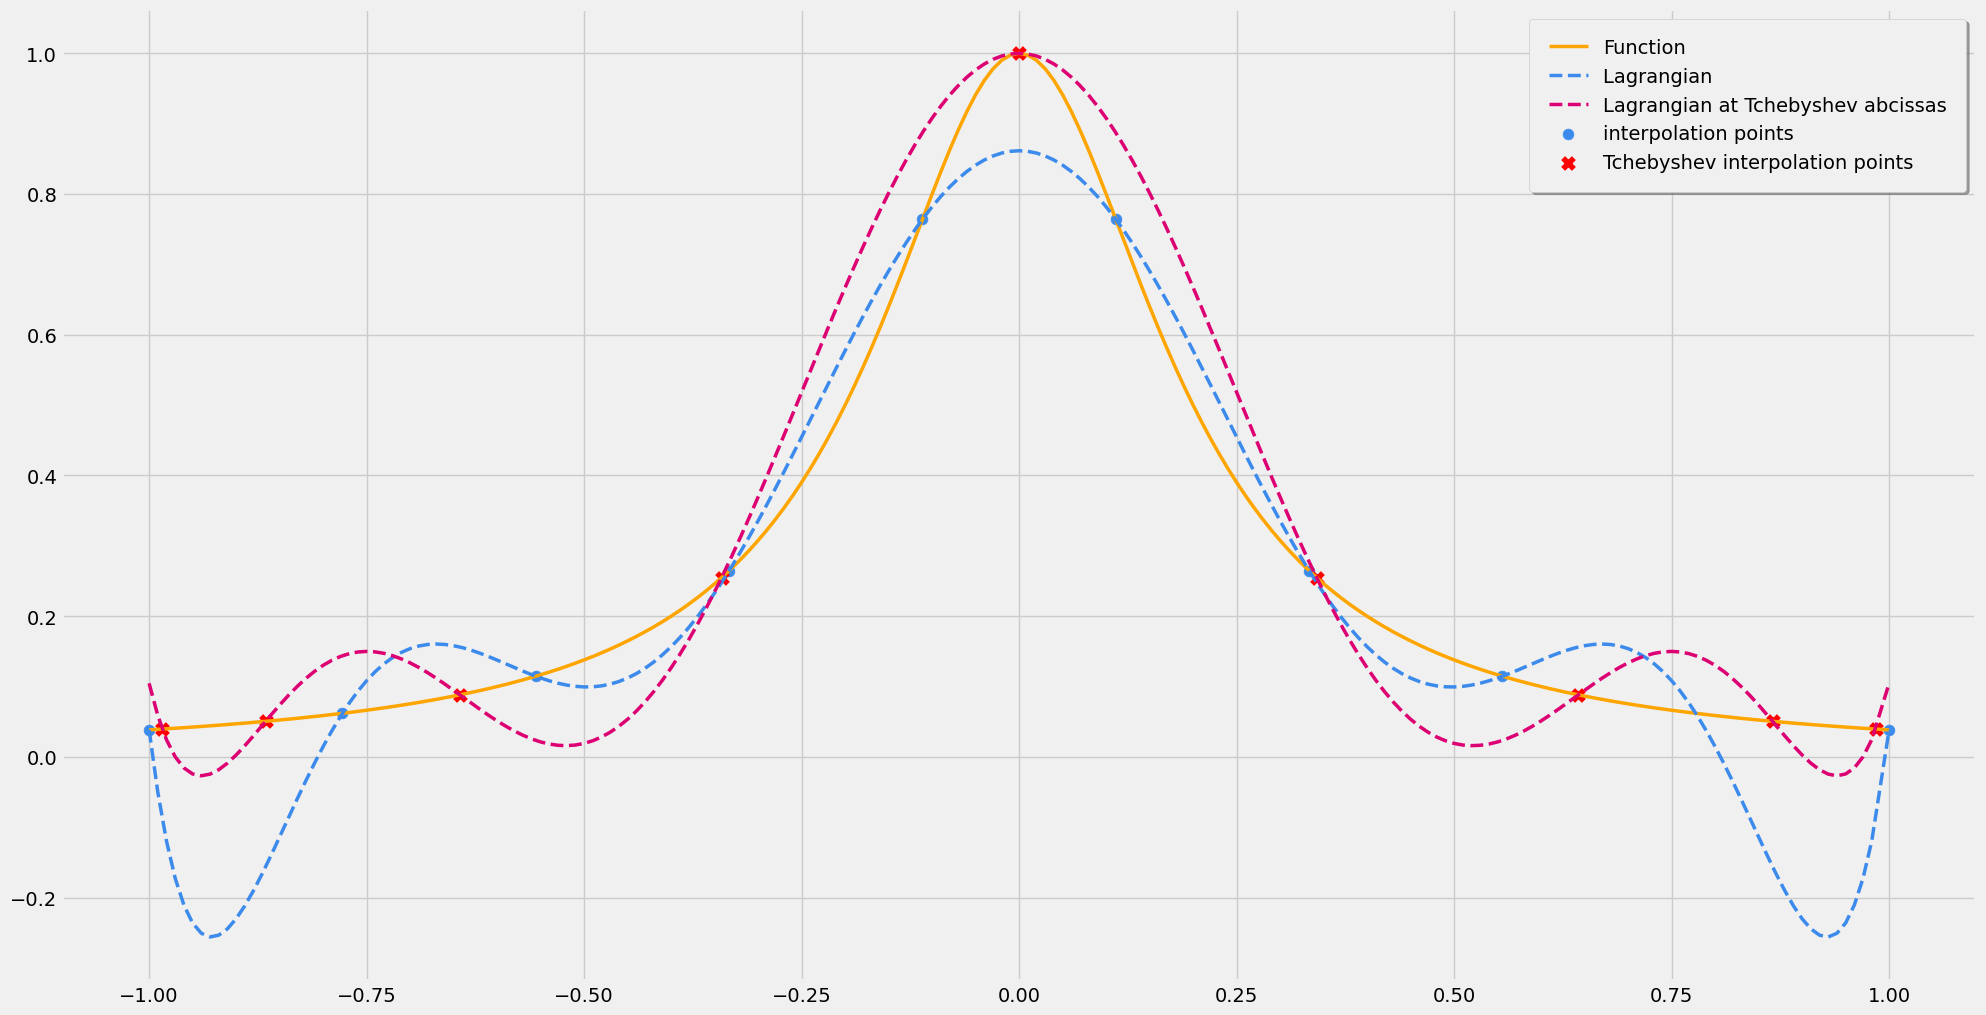

In [14]:
line_width = 2.5
ax = plt.subplot()
ax.plot(x, f_x, c='orange', label="Function", linewidth=line_width)
ax.plot(x_lagrangian, y_lagrangian, c='#3C8BEC', label="Lagrangian ", ls="dashed", linewidth=line_width)
ax.plot(x_lagrangian_tchebyshev, y_lagrangian_tchebyshev, c="#DC0073", label="Lagrangian at Tchebyshev abcissas", ls="dashed", linewidth=line_width)
ax.scatter(x_samples, y_samples, c='#3C8BEC', label="interpolation points", s=60)
ax.scatter(x_lagrangian_tchebyshev_samples, y_lagrangian_tchebyshev_samples, c='red', label="Tchebyshev interpolation points", marker='x', s=60)
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)

<h3><b>Linear Spline interpolation</b></h3>

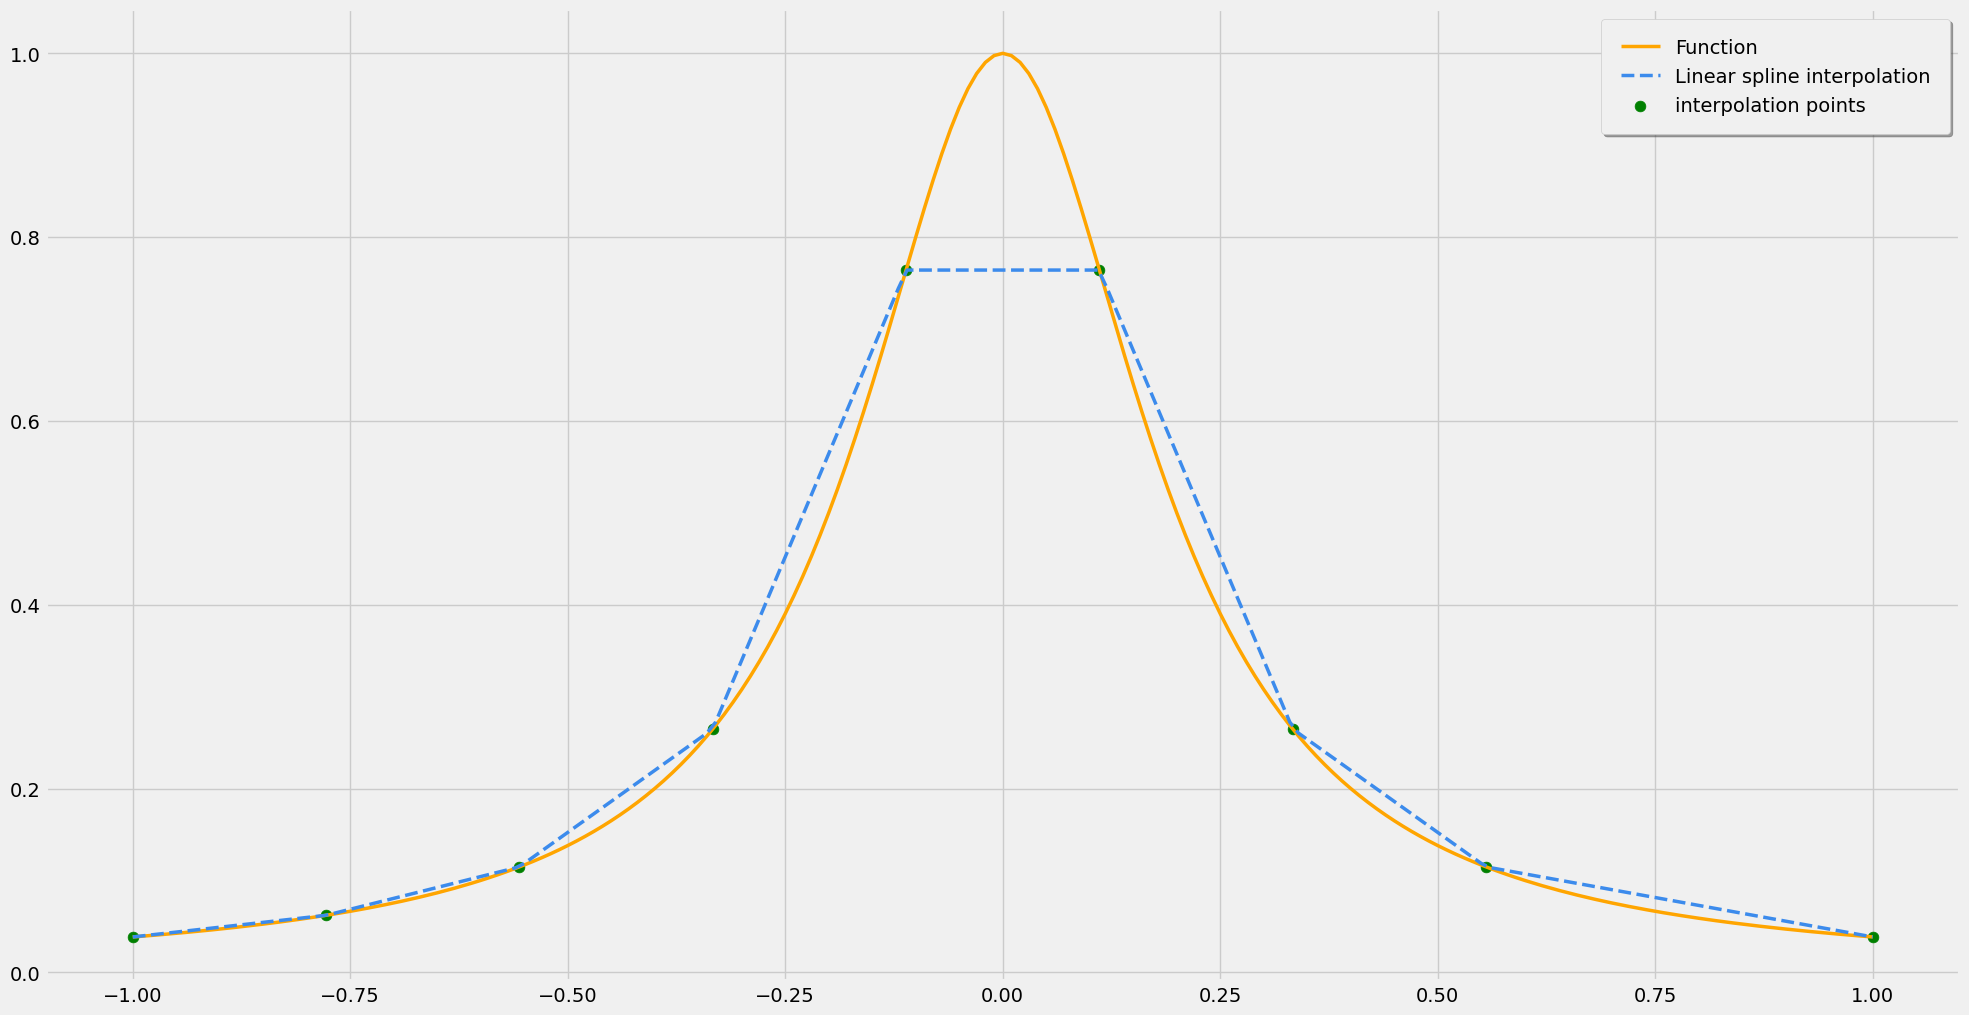

In [15]:
line_width = 2.5
ax = plt.subplot()
ax.plot(x, f_x, c='orange', label="Function", linewidth=line_width)
ax.plot(x_linear_splines, y_linear_splines, c='#3C8BEC', label="Linear spline interpolation", ls='dashed', linewidth=line_width)
ax.scatter(x_samples, y_samples, c='green', label="interpolation points", s=60)
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, loc="upper right")

<h3><b>Cubic Spline interpolation</b></h3>

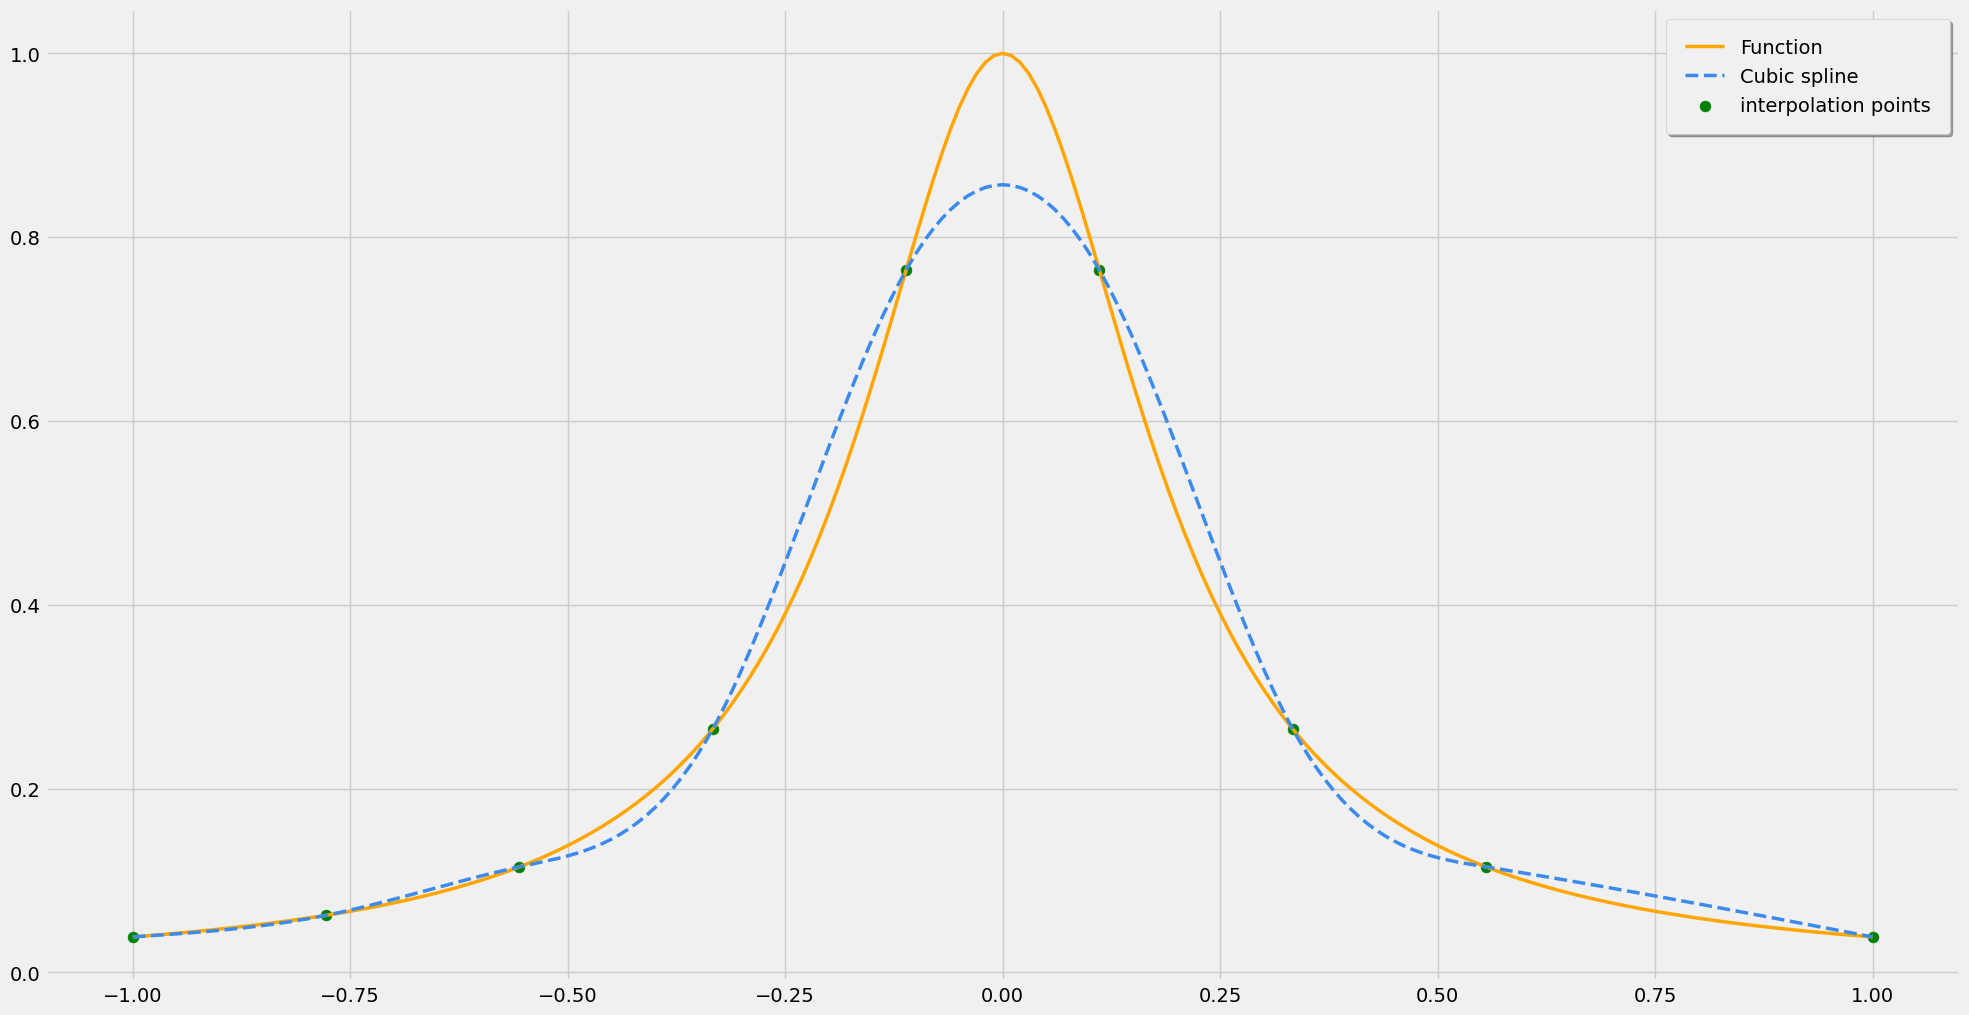

In [16]:
line_width = 2.5
ax = plt.subplot()
ax.plot(x, f_x, c='orange', label="Function", linewidth=line_width)
ax.plot(x_cubic_splines, y_cubic_splines, c='#3C8BEC', label="Cubic spline", ls='dashed', linewidth=line_width)
ax.scatter(x_samples, y_samples, c='green', label="interpolation points", s=60)
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, loc="upper right")

<h3><b>Lagrangian + Tchebyshev + Linear Spline + Cubic Spline Interpolations</b></h3>

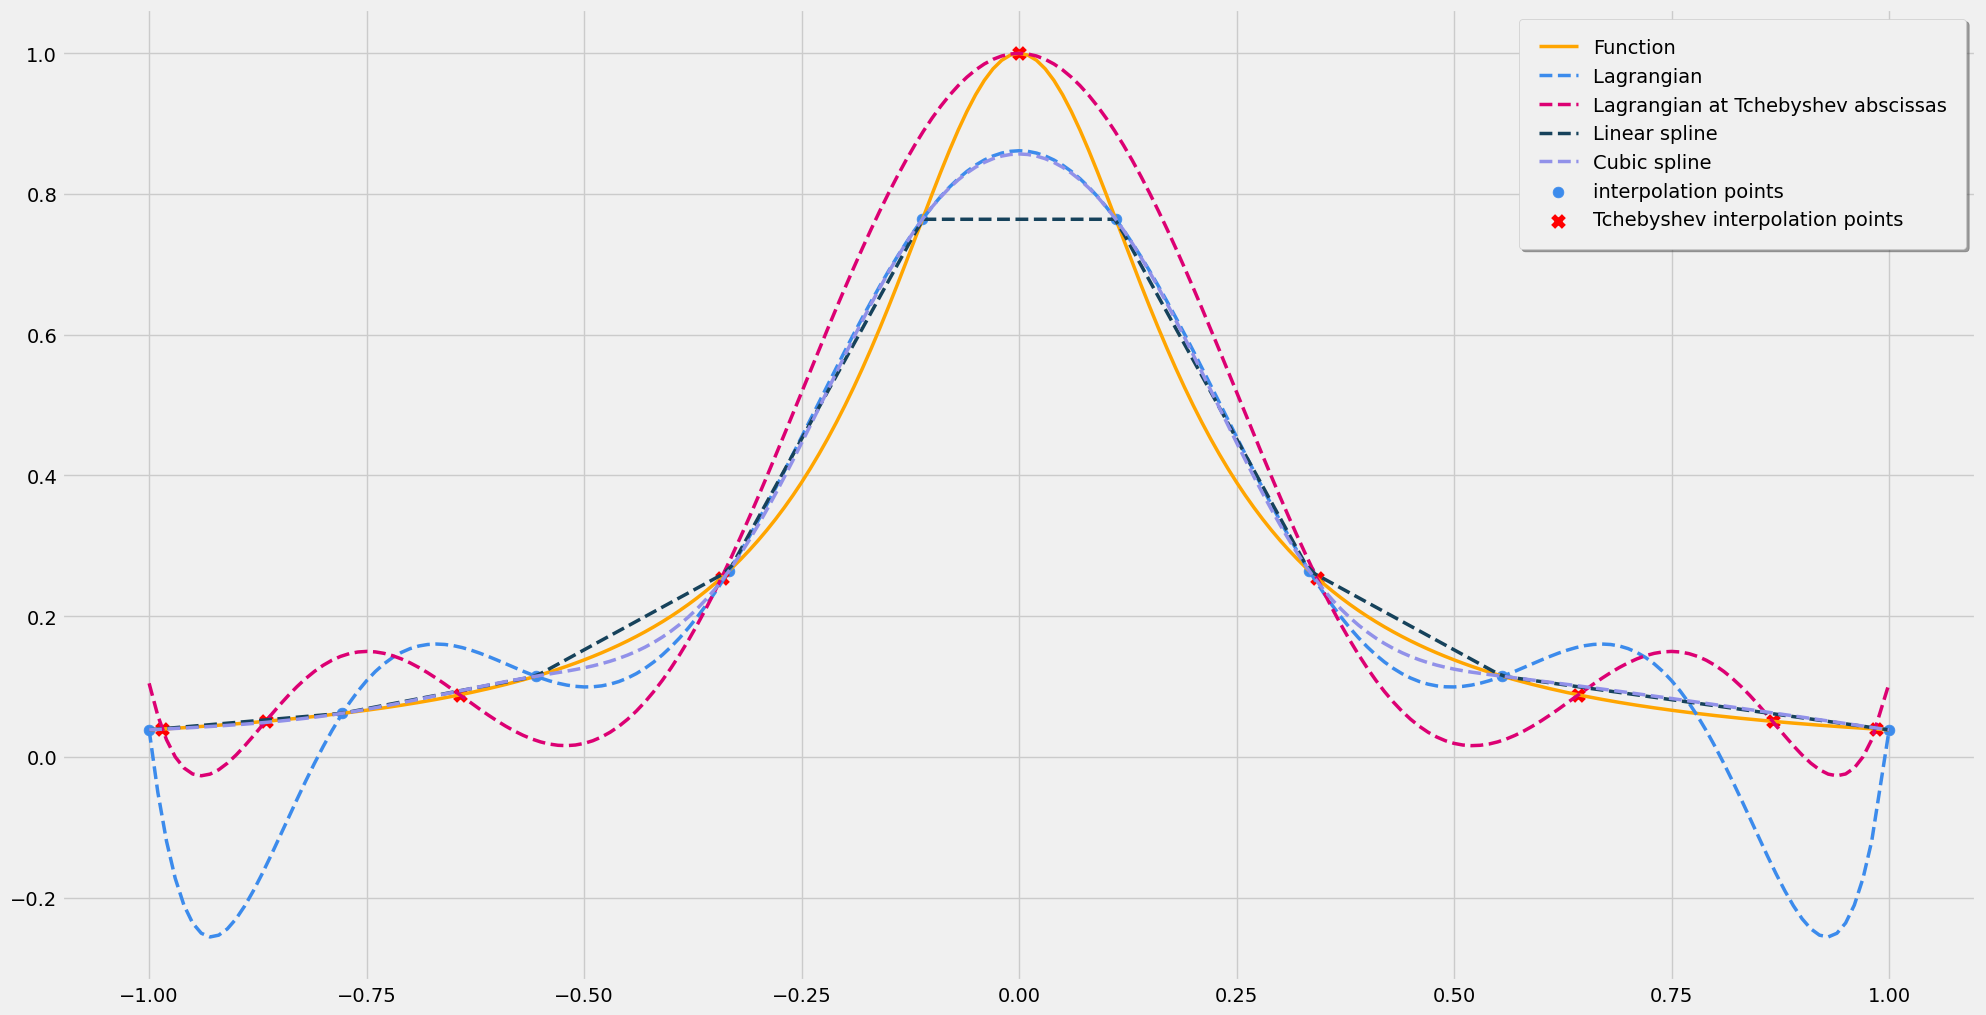

In [17]:
line_width = 2.5
ax = plt.subplot()
ax.plot(x, f_x, c='orange', label="Function", linewidth=line_width)
ax.plot(x_lagrangian, y_lagrangian, c='#3C8BEC', label="Lagrangian ", ls="dashed", linewidth=line_width)
ax.plot(x_lagrangian_tchebyshev, y_lagrangian_tchebyshev, c="#DC0073", label="Lagrangian at Tchebyshev abscissas", ls="dashed", linewidth=line_width)
ax.plot(x_linear_splines, y_linear_splines, c="#16425B", label="Linear spline", linewidth=line_width, ls="dashed")
ax.plot(x_cubic_splines, y_cubic_splines, c='#9191E9', label="Cubic spline", ls='dashed', linewidth=line_width)
ax.scatter(x_samples, y_samples, c='#3C8BEC', label="interpolation points", s=60)
ax.scatter(x_lagrangian_tchebyshev_samples, y_lagrangian_tchebyshev_samples, c='red', label="Tchebyshev interpolation points", marker='x', s=60)
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)

<h3><b>Interpolation Errors</b></h3>

<BarContainer object of 4 artists>

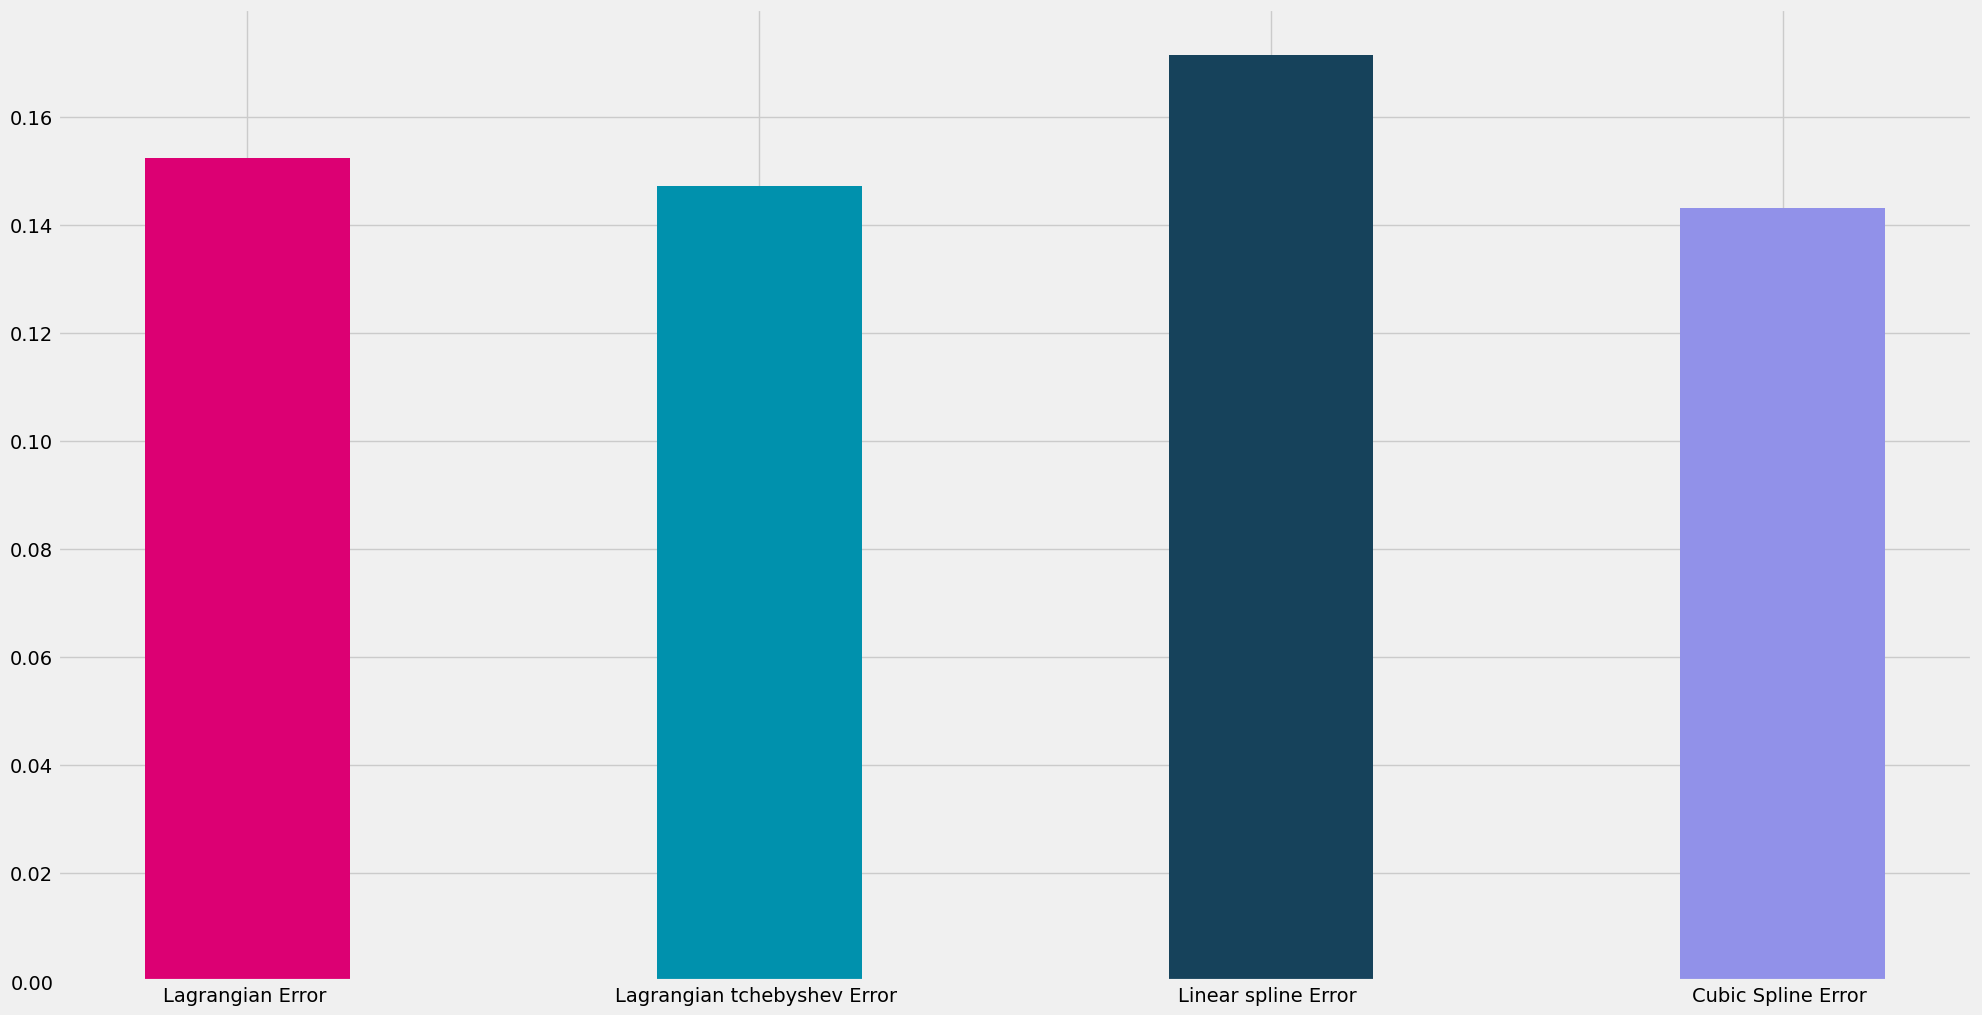

In [18]:
ax = plt.subplot()
colors = ["#DC0073", "#0091AD", "#16425B", "#9191E9"]
ax.bar(errors.keys(), errors.values(), width=.4, color=colors)